# Online K-Means
this implementation doesn't check for convergence directly, but instead works on the assumption that after enough iterations
convergence occurs\
you can adapt it at the end to do a basic difference check instead to be more efficient
<img src="https://i.ibb.co/PjJKBcb/online-k-means.png" alt="Online-k-means"  style="width: 600px;"/>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

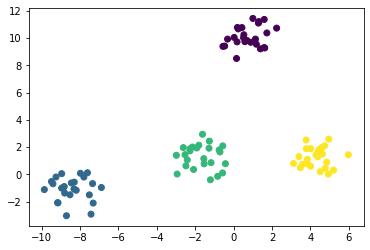

In [2]:
X , y = datasets.make_blobs(n_samples = 100, centers= 4 , n_features=2, cluster_std = 0.8 )
plt.scatter(X[:,0], X[:,1], c = y)
plt.show()

In [8]:
def online_kmean(X, K, step_size = 0.05, n_iter = 100):
    d = X.shape[1]
    centers = np.zeros([K,d])
    N = len(X)
    
    # choose centers randomly from data points
    for i in range(K):
        index = np.random.randint(0, N)
        centers[i] = X[index]
    
    #np.random.shuffle(X)
    for _iter in range(n_iter):
        for t in range(N):
            # calculate distance of each data point to all centers using euclidean distance           
            distance_all_centers = np.sqrt(np.sum((centers - X[t])** 2, axis =1) )
             # get index of closet center to data point
            i = np.argmin(distance_all_centers)
            #update the center
            centers[i] = centers[i] +  step_size * ( X[t] - centers[i] ) 

    return centers
        

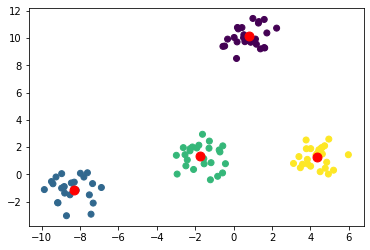

In [10]:
K = len(np.unique(y))
centers = online_kmean(X,K)


plt.scatter(X[:,0], X[:,1], c = y)
plt.scatter(centers[:,0], centers[:,1], c= 'red' , s=80)
plt.show()